# Example projection of a neighborhood-based cell state abundance phenotype to replicate association of phenotype to a known attribute (sex)

In [6]:
import numpy as np 
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import cna, pp, os
import statsmodels.api as sm
from projection import *
pp.umapprops['s']=0.3

ref_folder = "/data/srlab/lrumker/datasets/onek1k/pheno/"
src_folder = "/data/srlab/lrumker/datasets/perez_sle/pheno/"
minor_types = {"NK": ["NK"], "T": ['T4',  'T8'], "Myeloid": ["cM", "ncM", 'cDC', 'pDC'], "B": ['B',  'PB']}
fig_dir="/data/srlab/lrumker/MCSC_Project/cna-qtl/figs/"

In [3]:
all_res = pd.DataFrame()
for celltype in ["NK", "Myeloid", "B", "T"]:
    print(celltype)
    
    # load discovery dataset
    r = cna.read(ref_folder+celltype+".h5ad")
    covs = ['age']
    attr = 'sex_M'
    cna.tl.nam(r, batches=r.samplem['batch'], covs = r.samplem[covs], ks=[r.samplem.shape[0]]) #to store all nampcs
    res = cna.tl.association(r, r.samplem[attr], batches=r.samplem['batch'], covs = r.samplem[covs])
    
    # Projection into Perez et al
    covs_perez = ['age', 'sle']
    for cohort in ["ASI", "EUR"]:
        print(cohort)
        d = cna.read(src_folder+"symphony_output/projection_examples/"+cohort+"_"+celltype+".h5ad")
        
        # Import NAM seed information
        pred_idx = (pd.read_csv(src_folder+'symphony_output/projection_examples/'+cohort+"_"+celltype+"_in_ref_nngraph_idx.csv", 
                                index_col = 0).reset_index(drop = True)-1) # R to python indexing
        pred_dist = pd.read_csv(src_folder+'symphony_output/projection_examples/'+cohort+"_"+celltype+"_in_ref_nngraph_dist.csv", 
                                index_col = 0).reset_index(drop = True)
        pred_sim = 1/pred_dist # similarity

        # construct the NAM
        print("seeding NAM")
        NAM = seed_nam(r, d, pred_idx, pred_sim, sampleid="id")
        print("diffusing NAM")
        NAM = nam_diffuse_from_seed(r, NAM.T)
        
        # Project phenotype to replication dataset
        k = res.k
        D = np.identity(len(r.uns['NAM_svs'][:k]))*r.uns['NAM_svs'][:k]
        D_I = np.linalg.inv(D)
        mask = np.abs(res.ncorrs)>res.fdr_10p_t
        sampXpc = NAM[:,r.uns['keptcells']][:,mask].dot(r.uns['NAM_nbhdXpc'].iloc[:,:k].loc[mask,:]).dot(D_I)
        est_pheno = np.dot(sampXpc[:,:k], res.beta).reshape(-1,)
        features = sm.add_constant(d.samplem[covs_perez+[attr]])
        features.loc[:,attr] = features.loc[:,attr].values.astype(float)
        linmod = sm.OLS(est_pheno.astype(float), features).fit() 
        new = pd.DataFrame({"cohort":[cohort], "celltype":[celltype], "attr":[attr], 'P':[linmod.pvalues.loc[attr]],
                       'beta':[linmod.params[attr]], 'stderr':[linmod.bse[attr]]})
        all_res = pd.concat([all_res, new])

NK


/data/srlab/lrumker/MCSC_Project/cna/src/cna/tools/_association.py:79: UserWarning: global association p-value attained minimal possible value. Consider increasing Nnull
  warnings.warn('global association p-value attained minimal possible value. '+\


ASI
seeding NAM
Projecting sample 1197_1197 (1 of 98)
Projecting sample 1492_1492 (2 of 98)
Projecting sample HC-015 (3 of 98)
Projecting sample 1333_1333 (4 of 98)
Projecting sample 1056_1056 (5 of 98)
Projecting sample HC-574 (6 of 98)
Projecting sample 1326_1326 (7 of 98)
Projecting sample 1886_1886 (8 of 98)
Projecting sample HC-546 (9 of 98)
Projecting sample 1240_1240 (10 of 98)
Projecting sample 1791_1791 (11 of 98)
Projecting sample 1329_1329 (12 of 98)
Projecting sample 1404_1404 (13 of 98)
Projecting sample 1804_1804 (14 of 98)
Projecting sample 1119_1119 (15 of 98)
Projecting sample 1087_1087 (16 of 98)
Projecting sample 1741_1741 (17 of 98)
Projecting sample 1195_1195 (18 of 98)
Projecting sample 1472_1472 (19 of 98)
Projecting sample 1743_1743 (20 of 98)
Projecting sample 1754_1754 (21 of 98)
Projecting sample 2061_2061 (22 of 98)
Projecting sample 1045_1045 (23 of 98)
Projecting sample 1881_1881 (24 of 98)
Projecting sample 1248_1248 (25 of 98)
Projecting sample 1325_1325

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


seeding NAM
Projecting sample IGTB1871_IGTB1871 (1 of 139)
Projecting sample 1621_1621 (2 of 139)
Projecting sample HC-552 (3 of 139)
Projecting sample 1338_1338 (4 of 139)
Projecting sample IGTB1650_IGTB1650 (5 of 139)
Projecting sample HC-009 (6 of 139)
Projecting sample 1602_1602 (7 of 139)
Projecting sample IGTB2007_IGTB2007 (8 of 139)
Projecting sample 1004_1004 (9 of 139)
Projecting sample IGTB1916_IGTB1916 (10 of 139)
Projecting sample 1196_1196 (11 of 139)
Projecting sample 1892_1892 (12 of 139)
Projecting sample 1726_1726 (13 of 139)
Projecting sample HC-541 (14 of 139)
Projecting sample IGTB1828_IGTB1828 (15 of 139)
Projecting sample IGTB1827_IGTB1827 (16 of 139)
Projecting sample 1716_1716 (17 of 139)
Projecting sample IGTB1987_IGTB1987 (18 of 139)
Projecting sample IGTB1762_IGTB1762 (19 of 139)
Projecting sample IGTB1814_IGTB1814 (20 of 139)
Projecting sample 1928_1928 (21 of 139)
Projecting sample HC-512 (22 of 139)
Projecting sample 1297_1297 (23 of 139)
Projecting sample

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/data/srlab/lrumker/MCSC_Project/cna/src/cna/tools/_association.py:79: UserWarning: global association p-value attained minimal possible value. Consider increasing Nnull
  warnings.warn('global association p-value attained minimal possible value. '+\


ASI
seeding NAM
Projecting sample HC-519 (1 of 98)
Projecting sample HC-501 (2 of 98)
Projecting sample 1240_1240 (3 of 98)
Projecting sample 1472_1472 (4 of 98)
Projecting sample 1334_1334 (5 of 98)
Projecting sample HC-573 (6 of 98)
Projecting sample 1294_1294 (7 of 98)
Projecting sample 1754_1754 (8 of 98)
Projecting sample HC-571 (9 of 98)
Projecting sample 1772_1772 (10 of 98)
Projecting sample 1193_1193 (11 of 98)
Projecting sample 1886_1886 (12 of 98)
Projecting sample 1480_1480 (13 of 98)
Projecting sample 1522_1522 (14 of 98)
Projecting sample 1022_1022 (15 of 98)
Projecting sample HC-558 (16 of 98)
Projecting sample 1326_1326 (17 of 98)
Projecting sample 1197_1197 (18 of 98)
Projecting sample 1329_1329 (19 of 98)
Projecting sample 1279_1279 (20 of 98)
Projecting sample 1056_1056 (21 of 98)
Projecting sample 1417_1417 (22 of 98)
Projecting sample HC-500 (23 of 98)
Projecting sample 1121_1121 (24 of 98)
Projecting sample 1680_1680 (25 of 98)
Projecting sample 1031_1031 (26 of 9

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


seeding NAM
Projecting sample 1132_1132 (1 of 140)
Projecting sample 1285_1285 (2 of 140)
Projecting sample 1961_1961 (3 of 140)
Projecting sample IGTB1826_IGTB1826 (4 of 140)
Projecting sample HC-526 (5 of 140)
Projecting sample 1414_1414 (6 of 140)
Projecting sample 1110_1110 (7 of 140)
Projecting sample 1928_1928 (8 of 140)
Projecting sample 1596_1596 (9 of 140)
Projecting sample HC-540 (10 of 140)
Projecting sample IGTB1996_IGTB1996 (11 of 140)
Projecting sample IGTB1974_IGTB1974 (12 of 140)
Projecting sample HC-009 (13 of 140)
Projecting sample 1545_1545 (14 of 140)
Projecting sample 1726_1726 (15 of 140)
Projecting sample 1203_1203 (16 of 140)
Projecting sample IGTB1966_IGTB1966 (17 of 140)
Projecting sample 1068_1068 (18 of 140)
Projecting sample IGTB1768_IGTB1768 (19 of 140)
Projecting sample 1947_1947 (20 of 140)
Projecting sample HC-516 (21 of 140)
Projecting sample 1760_1760 (22 of 140)
Projecting sample IGTB1844_IGTB1844 (23 of 140)
Projecting sample IGTB1762_IGTB1762 (24 o

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/data/srlab/lrumker/MCSC_Project/cna/src/cna/tools/_association.py:79: UserWarning: global association p-value attained minimal possible value. Consider increasing Nnull
  warnings.warn('global association p-value attained minimal possible value. '+\


ASI
seeding NAM
Projecting sample 1294_1294 (1 of 98)
Projecting sample 1767_1767 (2 of 98)
Projecting sample 1325_1325 (3 of 98)
Projecting sample 1087_1087 (4 of 98)
Projecting sample 1741_1741 (5 of 98)
Projecting sample 1791_1791 (6 of 98)
Projecting sample HC-563 (7 of 98)
Projecting sample HC-574 (8 of 98)
Projecting sample 1404_1404 (9 of 98)
Projecting sample 1122_1122 (10 of 98)
Projecting sample 1418_1418 (11 of 98)
Projecting sample 1417_1417 (12 of 98)
Projecting sample HC-014 (13 of 98)
Projecting sample HC-022 (14 of 98)
Projecting sample 1197_1197 (15 of 98)
Projecting sample 1366_1366 (16 of 98)
Projecting sample 1584_1584 (17 of 98)
Projecting sample 1743_1743 (18 of 98)
Projecting sample 1333_1333 (19 of 98)
Projecting sample HC-015 (20 of 98)
Projecting sample 1051_1051 (21 of 98)
Projecting sample 1768_1768 (22 of 98)
Projecting sample 1479_1479 (23 of 98)
Projecting sample 1452_1452 (24 of 98)
Projecting sample 1054_1054 (25 of 98)
Projecting sample HC-545 (26 of 9

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


EUR
seeding NAM
Projecting sample 1256_1256 (1 of 138)
Projecting sample 1848_1848 (2 of 138)
Projecting sample IGTB1996_IGTB1996 (3 of 138)
Projecting sample HC-536 (4 of 138)
Projecting sample HC-578 (5 of 138)
Projecting sample 1285_1285 (6 of 138)
Projecting sample IGTB1895_IGTB1895 (7 of 138)
Projecting sample 1270_1270 (8 of 138)
Projecting sample IGTB1828_IGTB1828 (9 of 138)
Projecting sample 1827_1827 (10 of 138)
Projecting sample IGTB826_IGTB826 (11 of 138)
Projecting sample 1857_1857 (12 of 138)
Projecting sample IGTB1982_IGTB1982 (13 of 138)
Projecting sample IGTB1952_IGTB1952 (14 of 138)
Projecting sample IGTB1840_IGTB1840 (15 of 138)
Projecting sample IGTB1731_IGTB1731 (16 of 138)
Projecting sample 1958_1958 (17 of 138)
Projecting sample IGTB1871_IGTB1871 (18 of 138)
Projecting sample 1621_1621 (19 of 138)
Projecting sample IGTB1826_IGTB1826 (20 of 138)
Projecting sample IGTB1290_IGTB1290 (21 of 138)
Projecting sample 2082_2082 (22 of 138)
Projecting sample IGTB1901_IGTB19

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/data/srlab/lrumker/MCSC_Project/cna/src/cna/tools/_association.py:79: UserWarning: global association p-value attained minimal possible value. Consider increasing Nnull
  warnings.warn('global association p-value attained minimal possible value. '+\


ASI
seeding NAM
Projecting sample HC-546 (1 of 98)
Projecting sample 1479_1479 (2 of 98)
Projecting sample 1333_1333 (3 of 98)
Projecting sample 1248_1248 (4 of 98)
Projecting sample HC-520 (5 of 98)
Projecting sample 1743_1743 (6 of 98)
Projecting sample 1341_1341 (7 of 98)
Projecting sample 1101_1101 (8 of 98)
Projecting sample 1226_1226 (9 of 98)
Projecting sample 1122_1122 (10 of 98)
Projecting sample 1262_1262 (11 of 98)
Projecting sample 1522_1522 (12 of 98)
Projecting sample 1054_1054 (13 of 98)
Projecting sample HC-580 (14 of 98)
Projecting sample 1772_1772 (15 of 98)
Projecting sample 1420_1420 (16 of 98)
Projecting sample 1737_1737 (17 of 98)
Projecting sample 1682_1682 (18 of 98)
Projecting sample HC-573 (19 of 98)
Projecting sample 1366_1366 (20 of 98)
Projecting sample 1325_1325 (21 of 98)
Projecting sample 1419_1419 (22 of 98)
Projecting sample 1222_1222 (23 of 98)
Projecting sample 1165_1165 (24 of 98)
Projecting sample 1051_1051 (25 of 98)
Projecting sample 1294_1294 (2

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


EUR
seeding NAM
Projecting sample IGTB670_IGTB670 (1 of 140)
Projecting sample 1368_1368 (2 of 140)
Projecting sample HC-540 (3 of 140)
Projecting sample HC-006 (4 of 140)
Projecting sample 1219_1219 (5 of 140)
Projecting sample IGTB2065_IGTB2065 (6 of 140)
Projecting sample 1249_1249 (7 of 140)
Projecting sample 1340_1340 (8 of 140)
Projecting sample HC-578 (9 of 140)
Projecting sample HC-585 (10 of 140)
Projecting sample 1068_1068 (11 of 140)
Projecting sample 1543_1543 (12 of 140)
Projecting sample IGTB1844_IGTB1844 (13 of 140)
Projecting sample IGTB1815_IGTB1815 (14 of 140)
Projecting sample 1615_1615 (15 of 140)
Projecting sample 1545_1545 (16 of 140)
Projecting sample 1569_1569 (17 of 140)
Projecting sample IGTB645_IGTB645 (18 of 140)
Projecting sample IGTB514_IGTB514 (19 of 140)
Projecting sample 1947_1947 (20 of 140)
Projecting sample HC-572 (21 of 140)
Projecting sample IGTB1827_IGTB1827 (22 of 140)
Projecting sample HC-002 (23 of 140)
Projecting sample 1857_1857 (24 of 140)
P

/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [4]:
all_res['beta_mod'] = all_res.beta.values/(1e-9)
all_res['stderr_mod'] = all_res.stderr.values/(1e-9)
all_res['hl'] = all_res.beta_mod.values+all_res.stderr_mod.values
all_res['ll'] = all_res.beta_mod.values-all_res.stderr_mod.values
all_res['celltype_cohort'] = [all_res.cohort.values[i]+", "+all_res.celltype.values[i] \
                              for i in np.arange(all_res.shape[0])]

In [5]:
all_res.to_csv("/data/srlab/lrumker/MCSC_Project/cna-qtl/gwas_replication/replication_sex.csv") # save 
all_res

,cohort,celltype,attr,P,beta,stderr,beta_mod,stderr_mod,hl,ll,celltype_cohort
0,ASI,NK,sex_M,3.412313e-15,3.393291e-09,3.608596e-10,3.393291,0.360860,3.754151,3.032432,"ASI, NK"
0,EUR,NK,sex_M,4.270659e-13,2.862370e-09,3.564875e-10,2.862370,0.356487,3.218858,2.505883,"EUR, NK"
0,ASI,Myeloid,sex_M,1.083121e-08,3.304307e-08,5.268957e-09,33.043072,5.268957,38.312030,27.774115,"ASI, Myeloid"
0,EUR,Myeloid,sex_M,9.408646e-08,2.707197e-08,4.798945e-09,27.071971,4.798945,31.870917,22.273026,"EUR, Myeloid"
0,ASI,B,sex_M,1.390014e-33,9.508664e-09,5.061918e-10,9.508664,0.506192,10.014856,9.002473,"ASI, B"
0,EUR,B,sex_M,9.734951e-24,8.928553e-09,7.259917e-10,8.928553,0.725992,9.654545,8.202561,"EUR, B"
0,ASI,T,sex_M,6.332187e-26,4.145543e-10,2.837329e-11,0.414554,0.028373,0.442928,0.386181,"ASI, T"
0,EUR,T,sex_M,2.174793e-14,2.658916e-10,3.107509e-11,0.265892,0.031075,0.296967,0.234816,"EUR, T"


## Plot example for a single major cell type

In [7]:
# Use last object loaded (T cells, EUR cohort) to visualize example
empiric_corrs =[]
for i in np.arange(NAM.shape[1]):
    empiric_corrs.append(np.corrcoef(NAM[:,i], d.samplem[attr].values)[0,1])

In [9]:
# Phenotype-correlated genes reflect sex chromosome gene expression program
vargene_cors = []
for i_gene in np.arange(r.var.shape[0]):
    vargene_cors.append(np.corrcoef(r.X[res.kept, i_gene], res.ncorrs)[0,1])
vargene_cors=pd.DataFrame({'gene':r.var.index, 'cor': vargene_cors})
vargene_cors.iloc[np.argsort(vargene_cors.cor.values),:]

,gene,cor
1970,XIST,-0.417962
1002,PRKCQ-AS1,-0.137186
1972,JPX,-0.137142
692,LTB,-0.127202
1615,CCR7,-0.124665
...,...,...
2013,KDM5D,0.237176
2012,UTY,0.261971
2011,DDX3Y,0.322198
2009,USP9Y,0.322662


/tmp/ipykernel_11796/190848439.py:50: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(fig_dir+"replication_sex.png")
/PHShome/lar24/anaconda3/envs/py3_clone/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


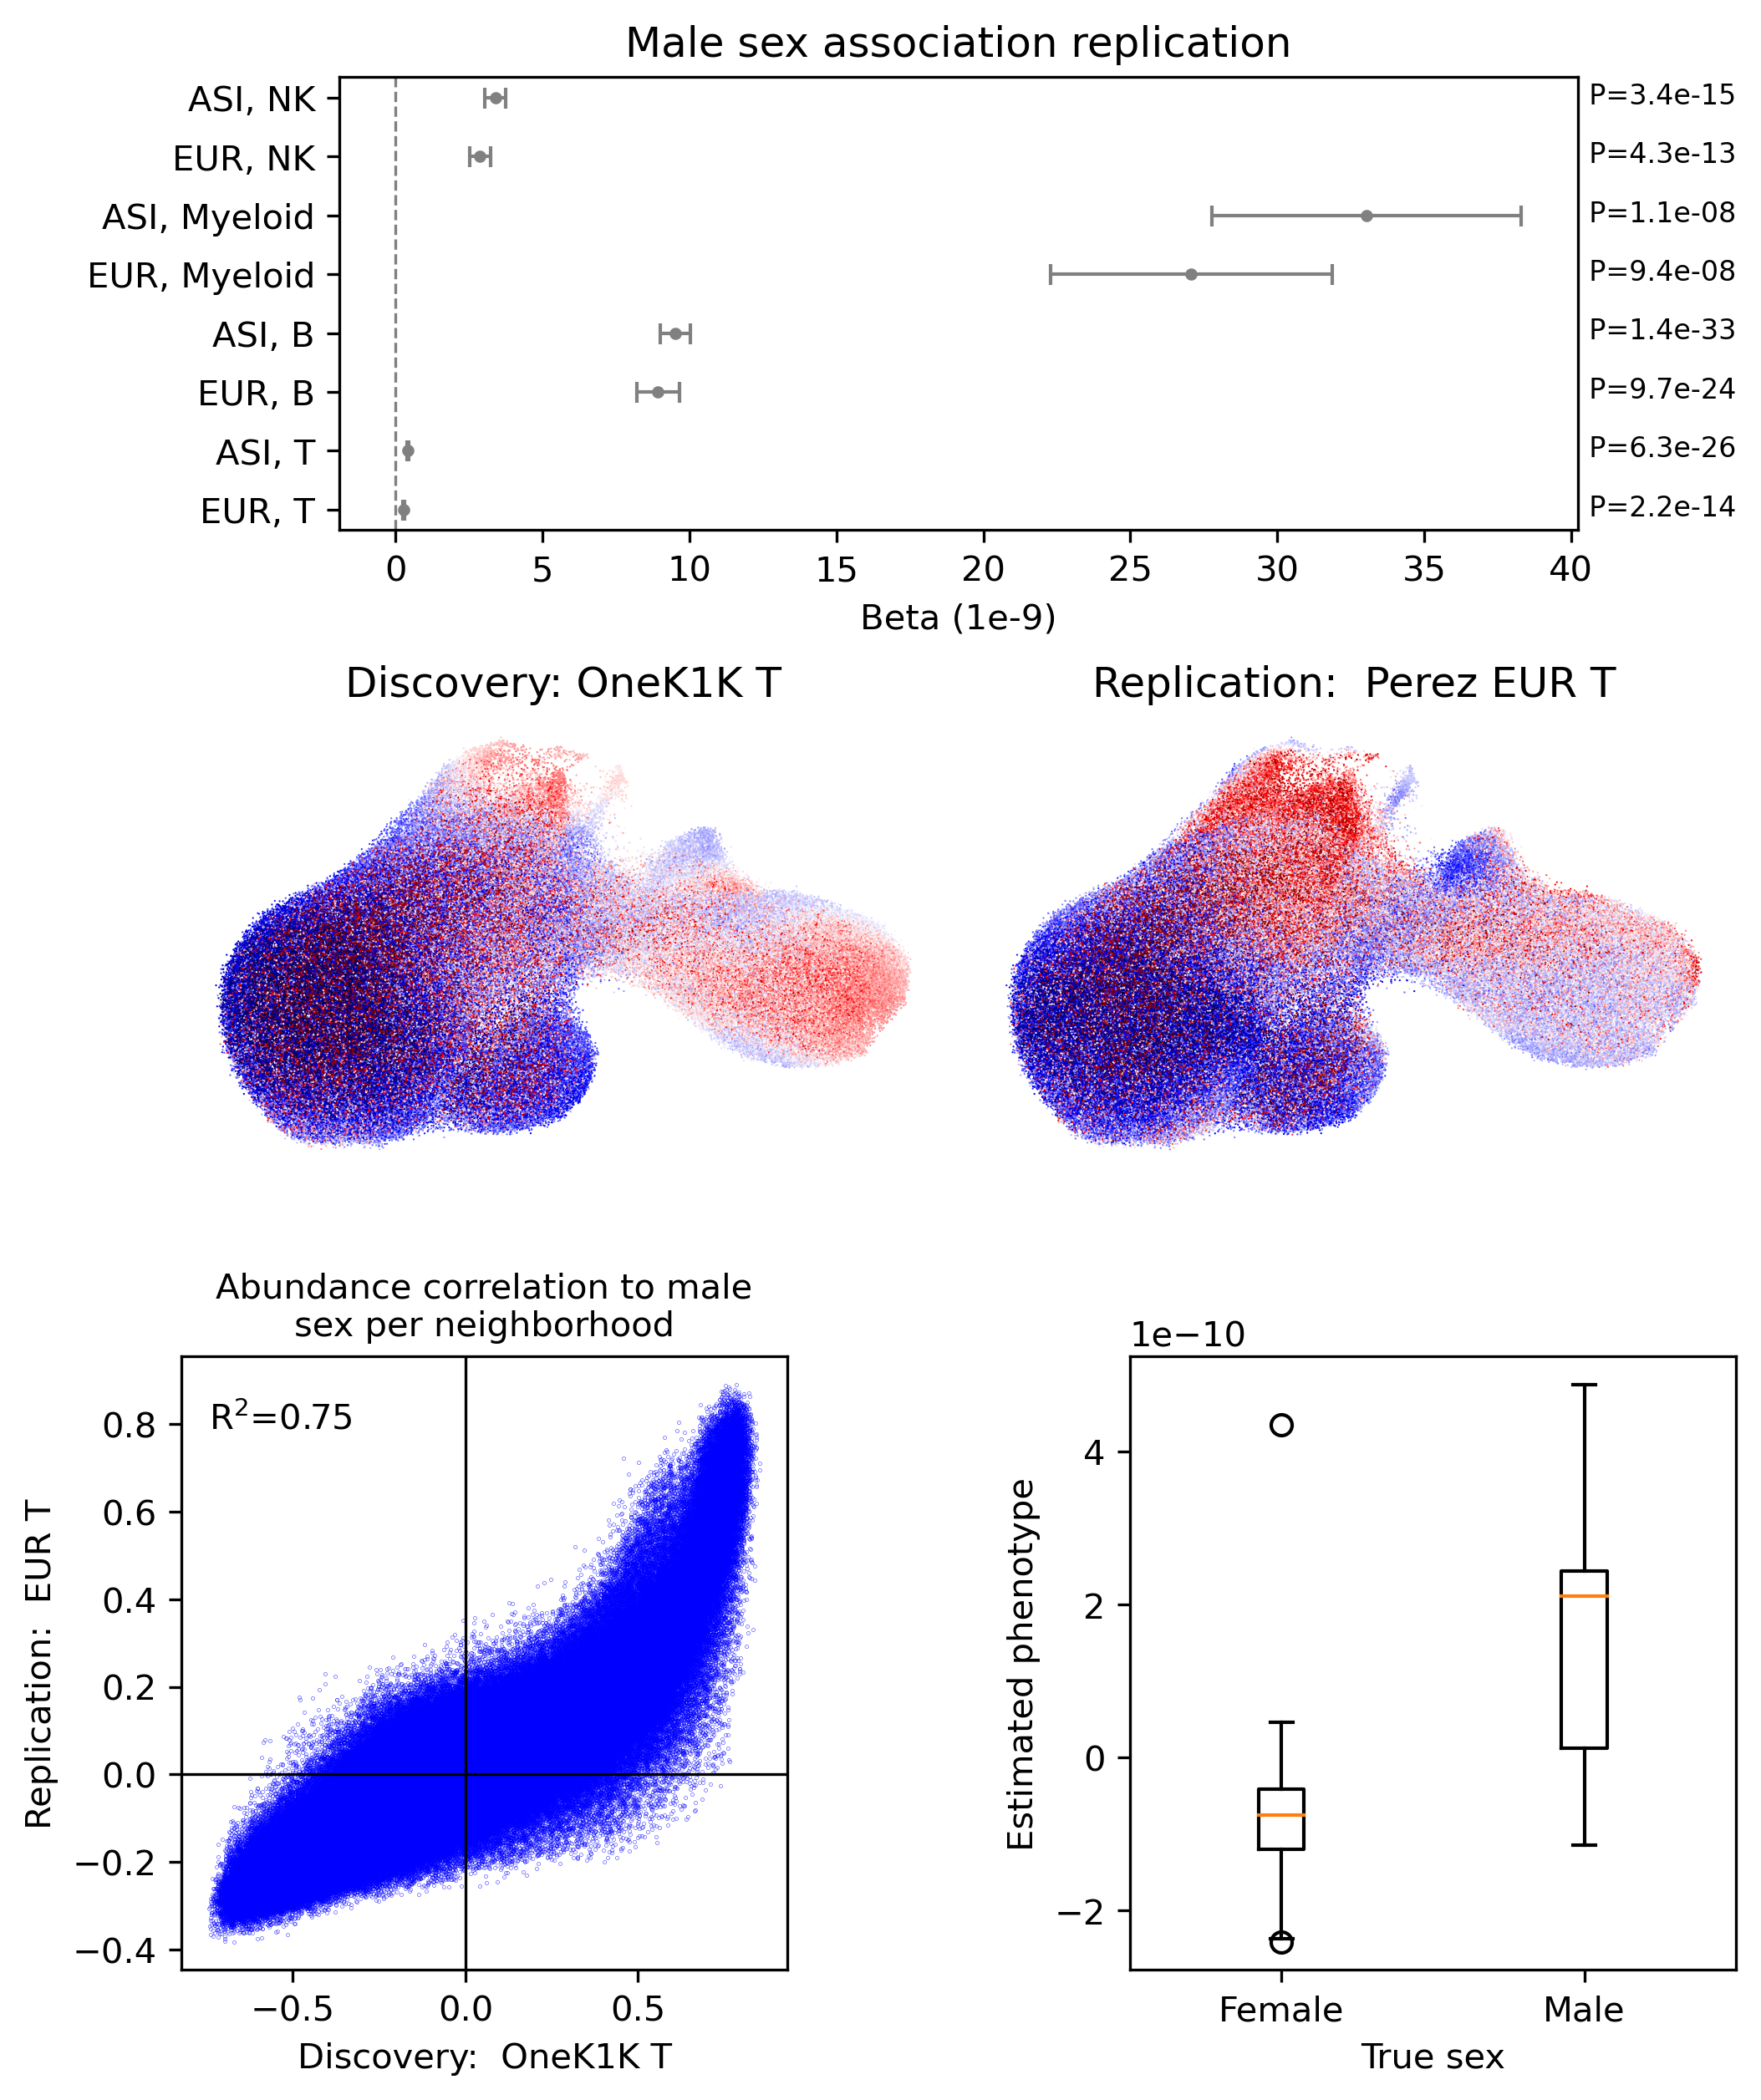

In [13]:
fig = plt.figure(tight_layout=True, figsize = (8,10), dpi=300)
gs = fig.add_gridspec(12, 10)
ax5 = fig.add_subplot(gs[0:3, 1:9])
ax1 = fig.add_subplot(gs[4:7, 0:5])
ax2 = fig.add_subplot(gs[4:7, 5:10])
ax3 = fig.add_subplot(gs[8:, 0:4])
ax4 = fig.add_subplot(gs[8:, 6:10])

pp.scatter_random(r.obsm['X_umap'][res.kept,0], r.obsm['X_umap'][res.kept,1],
                  c = res.ncorrs, ax = ax1, cmap="seismic")
ax1.set_title("Discovery: OneK1K T")
ax1.axis("off")

pp.scatter_random(r.obsm['X_umap'][res.kept,0], r.obsm['X_umap'][res.kept,1], 
                  c = np.array(empiric_corrs)[r.uns['keptcells']], ax = ax2, cmap = "seismic")
ax2.set_title("Replication:  Perez EUR T")
ax2.axis("off")

ax3.scatter(res.ncorrs, np.array(empiric_corrs)[r.uns['keptcells']], s = 0.01, c = "blue")
rsq=np.corrcoef(np.array(empiric_corrs)[r.uns['keptcells']], res.ncorrs)[0,1]**2
ax3.text(np.min(res.ncorrs), np.max(np.array(empiric_corrs)[r.uns['keptcells']])-0.1, "R$^2$="+str(np.around(rsq,2)))
ax3.set_xlabel("Discovery:  OneK1K T")
ax3.set_ylabel("Replication:  EUR T")
ax3.axvline(x=0, linewidth=0.8, linestyle='-', color='black')
ax3.axhline(y=0, linewidth=0.8, linestyle='-', color='black')
ax3.set_title("Abundance correlation to male\nsex per neighborhood", fontsize = 10)

x  = [np.array(est_pheno)[d.samplem.sex_M.values==0].reshape(-1,), 
      np.array(est_pheno)[d.samplem.sex_M.values==1].reshape(-1,)]
ax4.boxplot(x)
ax4.set_xlabel("True sex")
ax4.set_ylabel("Estimated phenotype")
ax4.set_xticks([1,2])
ax4.set_xticklabels(['Female', 'Male'])

mod_res = all_res.reset_index(drop = True)
mod_res['y'] = mod_res.index.values[::-1]
ci = mod_res.stderr_mod.values # plot one standard error above and below
ax5.axvline(x=0, linewidth=0.8, linestyle='--', color='grey')
ax5.errorbar(x=mod_res.beta_mod.values, y=mod_res.y.values, xerr=ci,
            color='grey',  capsize=3, linestyle='None', linewidth=1,
            marker=".", markersize=5, mfc="grey", mec="grey")
for i in np.arange(mod_res.shape[0]):
    ax5.text(40, mod_res.y[i]-0.1, "  P={:.1e}".format(mod_res.P[i]), fontsize = 8)
ax5.set_yticks(np.arange(mod_res.shape[0]))
ax5.set_yticklabels(mod_res.celltype_cohort.values[::-1])
ax5.set_xlabel('Beta (1e-9)')
ax5.set_title("Male sex association replication")

plt.savefig(fig_dir+"replication_sex.png")
plt.show()